# 0. Intro

## 0.1 Goal

Find a __linear combination__ of __features__ that projects a dataset to a __lower-dimensonal__ space and __characterizes__ or __separates__ two or more __classes__ of objects or events.

__Main idea__: Find projection to a line such that samples from different classes are well separated.

- The resulting combination may be used as a:

  1) Linear Classifier;

  2) Dimensionality reduction;

Boundaries of regions can be rough or smooth depending on prediction function.

## 0.2 Why LDA (Supervised)?

There are several ways to find linear decision boundary.

### 0.2.1 LDA vs Logistic Regression

Why need __LDA__, not __Logistic Regression__.

1) When classes are __well-seperated__, the parameter estimatess for __Logistic Regression__ model may be __unstable__;

2) If __n__ is small and the __distribution__ of predictor __X__ is approximately normal in each of the classes __LDA__ is __more stable__;

3) __More popular__ when we have __more than two__ response __classes__;

### 0.2.2 LDA vs PCA

__LDA__: Preserve as much of the class discriminatory information as possible.

## 0.3 Assumptions (Normality)

- ### Normal distributed data,

- ### Features that are statistically independent, and

- ### Identical covariance matrices for every class

# 1. LDA

## 1.1 Input: Feature - Label pairs

   ## $\forall i,\space \chi = (x_i^t,\underset{label}{y_i^t}) \in R^d$; $ x\in R^d, \space X \in R^{d\times N}$

   ## $\text{The target dimension will be reduced to d'}$

## 1.2 Output: 
   
   ## $w\in R^{d\times d'}, \text{ to do the dimensionality reduction}$

   ## $w^Tx_i \in R^{d'\times 1}, \text{to reconstruct: } ww^Tx_i \in R^{d\times 1}$
   
   ## $\text{Only the feature } x_i\in R^{d\times 1}$

## 1.3 Objective:

We seek to obtain a scalar $w^TX$ by projecting the samples __X__ onto a line;

Of all the possible lines we would like to select the one that __maximizes__ the __separability__ of the scalars

- In order to find a good projection vector, we need to define a __measure__ of __separation__ between the projections.

## 1.4 Fisher’s linear Discriminant

- ### Measure of Speration: 

1) __Mean__ of each class should be as __far__ as possible;

2) In each class, the __variance__ should be as __small__ as possible;

## $J(w) = \frac{\sum Distance_{mean}}{\sum Var_{\text{sample after projection}}}$

# 2. LDA, Two Classes

## 2.1 Problem

## $X \in \{X^t,y^t\}; \space if\space x^t\in C_1,\space r^t = 1,\space if\space x^t\in C_2,\space r^t = 0;$

- ## $\text{mean of $X \in C_1$: } \mu_1 \in R^d$

- ## $\text{mean of $X \in C_2$: } \mu_2 \in R^d$

- ## $\text{mean of $X \in C_1$ after projection: } m_1 = \frac{\sum_t w^TX^tr^t}{\sum_tr^t} \in R$

- ## $\text{mean of $X \in C_2$ after projection: } m_2 = \frac{\sum_t w^TX^tr^t}{\sum_t(1-r^t)} \in R$

## 2.2 Scatter Matrix

### 2.2.1 Between-Class Scatter Matrix

- ## $(m_1-m_2)^2 = (w^T\mu_1 - w^T\mu_2)^2 = (w^T\mu_1 - w^T\mu_2)(w^T\mu_1 - w^T\mu_2)^T = w^T(\mu_1-\mu_2)(\mu_1-\mu_2)^Tw = w^TS_Bw$

- ### $S_B$: Between-Class Scatter Matrix, symetric

### 2.2.2 Within-Class Scatter Matrix

- ### Scatter Matrix for Class One -> $S_1$

  ## $s_1^2 = \sum_t (w^Tx^t - m_1)^2r^t = \sum_t (w^Tx^t - m_1)(w^Tx^t - m_1)^Tr^t \\
  = \sum_t (w^Tx^t - w^T\mu_1)(w^Tx^t - w^T\mu_1)^Tr^t = \sum_t w^T(x^t - \mu_1)(w^Tx^t - w^T\mu_1)^Twr^t\\
  = w^T[\sum_t (x^t - \mu_1)(x^t - T\mu_1)^Tr^t]w\\
  = w^TS_1w \rightarrow S_1:\text{ symetric} $

- ### Scatter Matrix for Class Two -> $S_2$

  ## $s_2^2 = \sum_t (w^Tx^t - m_2)^2(1-r^t) = \sum_t (w^Tx^t - w^T\mu_2)(w^Tx^t - w^T\mu_2)^T(1-r^t)\\
  = \sum_t w^T(x^t - \mu_2)(x^t - \mu_2)^Tw(1-r^t) = w^T[\sum_t (x^t - \mu_2)(x^t - \mu_2)^T(1-r^t)]w\\
  = w^TS_2w \rightarrow S_2:\text{ symetric} $
  
- ### With-Class Scatter Matrix -> $S_w$

  ## $s_1^2 + s_2^2 = w^T(S_1+S_2)w = w^TS_Ww\rightarrow\text{ $S_W$: non-zero}$

## 2.3 Fisher's Linear Discriminant

## $J(w)=\frac{(m_1-m_2)^2}{s_1^2+s_2^2}= \frac{w^TS_Bw}{w^TS_Ww}$

## $\underset{x}{max}J(w)=\underset{x}{max}\frac{w^TS_Bw}{w^TS_Ww}$

## $\text{Let derivative of J(w) equals to zero}$

## $\Rightarrow\frac{d}{dw}J(w) = \frac{d}{dw}(\frac{w^TS_Bw}{w^TS_Ww})=0 \\
\Rightarrow \frac{1}{w^TS_Ww}\frac{d}{dw}[w^T(m_1-m_2)]^2+[w^T(m_1-m_2)]^2\frac{d}{dw}\frac{1}{w^TS_Ww}=0\\
\Rightarrow \frac{1}{w^TS_Ww}\frac{d}{dw}[w^T(m_1-m_2)]^2 - [w^T(m_1-m_2)]^2\frac{1}{(w^TS_Ww)^2}\frac{d}{dw}(w^TS_Ww) = 0\\
\Rightarrow (w^TS_Ww)\frac{d}{dw}[w^T(m_1-m_2)]^2-[w^T(m_1-m_2)]^2\frac{d}{dw}(w^TS_Ww)=0\\
\Rightarrow (w^TS_Ww)\frac{d}{dw}w^TS_Bw - (w^TS_Bw)\frac{d}{dw}(w^TS_Ww)=0\\
\Rightarrow (w^TS_Ww)(S_B^T+S_B)w - (w^TS_Bw)(S_W^T+S_W)w =0 \\
\Rightarrow (w^TS_Ww)2S_Bw - (w^TS_Bw)2S_Ww = 0 \\
\Rightarrow (w^TS_Ww)S_Bw - (w^TS_Bw)S_Ww =0 \rightarrow\text{ deviding $w^TS_Ww$}\\
\Rightarrow S_Bw - \frac{w^TS_Bw}{w^TS_Ww}S_Ww = 0 \\
\Rightarrow S_W^{-1}S_Bw - J(w)w = 0 \rightarrow\text{since J(w) is scalar} \\
\Rightarrow \text{J(w) is the eigen value of $S_W^{-1}S_B$, and w is eigen vector} 
$

### Now, solve the generalized eigenvalue problem

### Note: $S_BX$ for any vector X, points in the same direction as $\mu_1 - \mu_2$

### Proof:

## $\forall X,\space S_BX = (\mu_1-\mu_2)[(\mu_1-\mu_2)^TX] \\
\text{treat $[(\mu_1-\mu_2)^TX]$ as an arbitrary vector $\alpha$ }{\Rightarrow}S_BX = (\mu_1-\mu_2)\alpha
$

Q.E.D

## $\Rightarrow S_W^{-1}S_Bw = J(w)w$

## $\Rightarrow S_W^{-1}(\mu_1-\mu_2)\alpha = J(w)w$

## $\Rightarrow w = S_W^{-1}(\mu_1-\mu_2)\frac{\alpha}{J(w)}$

## $\text{since we don't care about the magnitude of w}$

## $\Rightarrow w^* = S_W^{-1}(\mu_1-\mu_2)$

## 2.4 Use Lagrangian to Solve LDA

## $\underset{w}{max}\frac{w^TS_Bw}{w^TS_Ww}$

## $\Downarrow$

## $\underset{w}{max\space}w^TS_Bw, \space st,\space w^TS_Ww=1\text{, since we don't care about the magnitude of w}$ 

## $L(w,\lambda)=w^TS_Bw-\lambda(w^TS_Ww-1)\text{, take derivative}$

## $\Rightarrow\frac{\partial}{\partial w}L(w,\lambda) = 2S_Bw-2\lambda S_W w =0$

## $\Rightarrow S_Bw = \lambda S_W w$

## $\text{since $S_W$ is semi-positive definite} \Rightarrow\text{$S_W$ is inversible;}$

## $\text{Define $S_W = S_W^{\frac{1}{2}}S_W^{\frac{1}{2}}$}$

## $\Rightarrow S_Bw = \lambda S_W^{\frac{1}{2}}S_W^{\frac{1}{2}}w\text{, let $u=S_W^{\frac{1}{2}}w$}$

## $\Rightarrow S_Bw = \lambda S_W^{\frac{1}{2}}u$

## $\Rightarrow S_W^{-\frac{1}{2}}S_Bw = \lambda u$

## $\Rightarrow \underset{\text{sysmetric matrix}}{[S_W^{-\frac{1}{2}}\lambda S_W^{\frac{1}{2}}]}u = \lambda u$

## $\Rightarrow \text{This problem is a regular eigenvalue problem for a symmetric, positive definite matrix;}$

## $\text{Remains to choose which eigenvalue and eigenvector corresponds to the desired solution;}$

## $\Rightarrow \text{Find dual formulation}$

## $L_{D} = \underset{\lambda}{inf}[L(w,\lambda)]=\underset{\lambda}{inf}[w^TS_Bw-\lambda(w^TS_Ww-1)]$

## $L_{D} = \underset{\lambda}{inf}[w^TS_Bw-\lambda w^TS_Ww + \lambda]$

## $L_{D} = \underset{\lambda}{inf}[w^T(S_Bw-\lambda S_Ww) + \lambda]$

## $\text{since when $S_Bw = \lambda S_W w$, L is maximized}$

## $\Rightarrow L_{D} = \underset{\lambda}{inf} \lambda\text{, which means maximize $\lambda$}$

# 3. LDA for Multi Classes

# 4. General Steps of LDA (5 Steps)

## 1) Compute the d-dimensional mean vectors for different classes from the dataset;

## 2) Compute the scatter matrices (between-class and within-class scatter matrix);

## 3) Compute the __eigenvectors__ and corresponding eigenvalues for the scatter matrices;

## 4) Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a $d\times k$ dimensional matrix (where each column represents an eigenvector);

## 5) Use this $d\times k$ eigenvector matrix to transform the samples onto the new subspace, $w^TX$.

# 5. Example: __[Iris Dataset](https://archive.ics.uci.edu/ml/datasets/Iris)__

- ## The 3 classes in Iris:

  ### 1) Iris-setosa (n=50)

  ### 2) Iris-versicolor (n=50)
  
  ### 3) Iris-virginica (n=50)

- ## The four features of the Iris dataset:

     ### 1) sepal length in cm

     ### 2) sepal width in cm

     ### 3) petal length in cm

     ### 4) petal width in cm

## 5.1 Import Data

In [7]:
import pandas as pd

df1 = pd.read_csv('Iris.csv',header = None) # DataFrame

In [37]:
df = pd.io.parsers.read_csv(filepath_or_buffer = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                          header = None,
                          sep = ',',) # DataFrame

## 5.2 Define Features

In [38]:
feature_dict = {i:label for i,label in zip(
                range(4),
                ( 'sepal length in cm',
                 'sepal width in cm',
                 'petal length in cm',
                 'petal width in cm',
                ))}

In [39]:
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how = 'all',inplace = True)
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 5.3 Convert Label to Numeric Numbers

In [79]:
from sklearn.preprocessing import LabelEncoder

X = df.ix[:,0:4].values
y = df['class label'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1:'Iris-setoa', 2: 'Iris-versicolor', 3: 'Iris-virginica'}

## 5.4 Histograms and Feature Selection

In [61]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

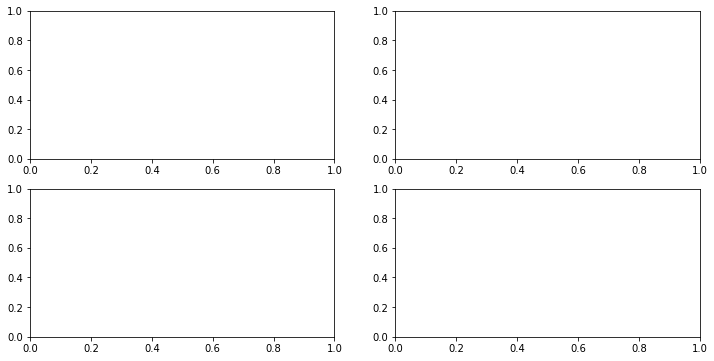

In [62]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,6))

## 5.5 LDA

### 1) Step 1: Compute the d-dimensional mean vectors

In [85]:
np.set_printoptions(precision = 4) # Determine the way floating point numbers, arrays and other NumPy objects are displayed.

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl],axis = 0))
    print('Mean Vector class %s: %s\n' %(cl,mean_vectors[cl-1]))

Mean Vector class 1: [ 5.006  3.418  1.464  0.244]

Mean Vector class 2: [ 5.936  2.77   4.26   1.326]

Mean Vector class 3: [ 6.588  2.974  5.552  2.026]



### 2) Step 2: Computing the Scatter Matrices

- ### Within Class Scatter Matrix $S_W$

## $S_W = \sum_{i}^{c}S_i\text{, i: class #}$

## $\text{where}$

## $S_i = \sum_{x\in D_{i}}^{N}(x-\mu_i)_{4\times 150}(x-\mu_i)^T_{150\times 4} \rightarrow\text{scatter matrix for every class}$

## $\text{and $\mu_i$ is the mean vector: } \mu_i = \frac{1}{N_i}\sum_{x\in D_i}^{N}x_k$

In [87]:
S_W = np.zeros((4,4))

for cl, mv in zip(range(1,4),mean_vectors):
    class_sc_mat = np.zeros((4,4))                 # Scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(4,1),mv.reshape(4,1) # Make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                            # Sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[ 38.9562  13.683   24.614    5.6556]
 [ 13.683   17.035    8.12     4.9132]
 [ 24.614    8.12    27.22     6.2536]
 [  5.6556   4.9132   6.2536   6.1756]]


- ### Between Class Scatter Matrix $S_B$

## $S_B = \sum_{i=1}^{c}N_i(\mu_i -\mu)(\mu_i -\mu)^T$

## $\text{where $\mu$ is the overall mean, and $\mu_i$ and $N_i$ are the sample mean and sizes of the repective classes.}$

In [97]:
overall_mean = np.mean(X, axis = 0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):
    n = X[y==i+1,:].shape[0] # or n = len(X[y==3,:])
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print ('Between Class Scatter Matrix:\n', S_B)

Between Class Scatter Matrix:
 [[ 1.2642 -0.3907  3.3033  1.4273]
 [-0.3907  0.2196 -1.1211 -0.4498]
 [ 3.3033 -1.1211  8.7329  3.7382]
 [ 1.4273 -0.4498  3.7382  1.6121]]


### 3) Step 3: Solving the generalized eigenvalue problem for the matrix $S_W^{-1}S_B$

In [100]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('\nEigenvector {}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 0.2049]
 [ 0.3871]
 [-0.5465]
 [-0.7138]]

Eigenvector 1: 6.45e-01

Eigenvector 2: 
[[-0.009 ]
 [-0.589 ]
 [ 0.2543]
 [-0.767 ]]

Eigenvector 2: 5.55e-03

Eigenvector 3: 
[[ 0.295 ]
 [ 0.2202]
 [ 0.2942]
 [-0.882 ]]

Eigenvector 3: -3.61e-17

Eigenvector 4: 
[[-0.2251]
 [ 0.4008]
 [ 0.4614]
 [-0.7588]]

Eigenvector 4: 1.24e-16


- ### Check the eigenvector-eigenvalue calculation

## $S_W^{-1}S_Bw=\lambda w$

In [103]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(4,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                        eig_vals[i]*eigv,
                                        decimal = 6, err_msg = '', verbose = True)
print('ok')

ok


### 4) Step 4: Selecting Linear Discriminants for the new feature subspace (Sort & Pick)

- ### Sorting the eigenvectors by decreasing eigenvalues

In [104]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range((len(eig_vals)))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key = lambda k:k[0], reverse = True)

# Visually confirm that the list is the correcly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

0.645439155995
0.0055513372768
1.23622593698e-16
3.61345611689e-17


In [105]:
# Express the "explained variance" as percentage:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}:{1:.2%}'.format(i+1,(j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1:99.15%
eigenvalue 2:0.85%
eigenvalue 3:0.00%
eigenvalue 4:0.00%


- ### Choosing k eigenvectors with the largest eigenvalues

In [106]:
w = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix w:\n', w.real)

Matrix w:
 [[ 0.2049 -0.009 ]
 [ 0.3871 -0.589 ]
 [-0.5465  0.2543]
 [-0.7138 -0.767 ]]


### 5) Step 5: Transforming the samples onto the new subspace

In [107]:
X_lda = X.dot(w)
assert X_lda.shape == (150,2), "The matrix is not 150x2 dimensional"

In [108]:
from matplotlib import pyplot as plt

In [123]:
def plot_step_lda():
    
    ax = plt.subplot(111)
    for label, marker, color in zip(
    range(1,4),('^','s','o'),('blue','red','green')):
        plt.scatter(x = X_lda[:,0].real[y == label],
                   y = X_lda[:,1].real[y == label],
                   marker = marker,
                   color = color,
                   alpha = 0.5,
                   label = label_dict[label] # label_dict = {1:'Iris-setoa', 2: 'Iris-versicolor', 3: 'Iris-virginica'}
                   )
    plt.xlabel('LDA1')
    plt.ylabel('LDA2')
    
    leg = plt.legend(loc = 'upper right', fancybox = True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')
    
    # hide axis ticks
    plt.tick_params(axis = "both", which = "both", bottom = "off", top = "off",
                  labelbottom = "on", left = "off", right = "off",labelleft = "on")
    
    
    # remove axis spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    
  
    plt.grid()
    plt.tight_layout
    plt.show()

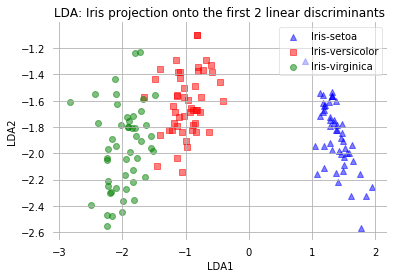

In [124]:
plot_step_lda()

# Appendix

## A. How many Subset?

- ### Set size: d, how many subset?

## $\binom dk= \frac{d!}{k!(d-k)!}$

## $\sum_0\binom dk = \binom d0 +...+\binom dn = 2^d$

## B. Python Code

### 1. [np.set_printoptions](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.set_printoptions.html)

## C. Reference

1. __[CS434a/541a: Pattern Recognition](http://www.csd.uwo.ca/~olga/Courses/CS434a_541a/Lecture8.pdf)__

2. __[A Tutorial on Data Reduction Linear Discriminant Analysis (LDA)](https://www.lsv.uni-saarland.de/fileadmin/teaching/dsp/ss15/DSP2016/matdid437773.pdf)__

3. __[L10: Linear discriminants analysis](http://research.cs.tamu.edu/prism/lectures/pr/pr_l10.pdf)__

4. __[Linear Discriminant Analysis – Bit by Bit](http://sebastianraschka.com/Articles/2014_python_lda.html)__

5. __[Dimensionality Reduction](http://courses.media.mit.edu/2010fall/mas622j/ProblemSets/slidesPCA.pdf)__

6. __[PCA and LDA](http://www.svcl.ucsd.edu/courses/ece271B-F09/handouts/Dimensionality2.pdf)__

7. __[Fisher Linear Discriminant Analysis](https://www.ics.uci.edu/~welling/teaching/273ASpring09/Fisher-LDA.pdf)__

8. __Introduction to Machine Learning__

9. __Matrix Cookbook__

10. __[Linear regression of indicators,
linear discriminant analysis](http://www.stat.cmu.edu/~ryantibs/datamining/)__